In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

Original


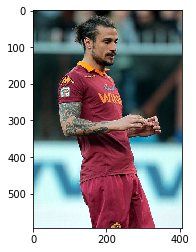

Heart


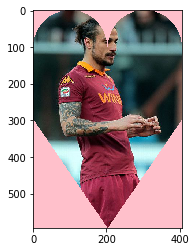

In [319]:
#problem 1
def heart(im):
    img = mpimg.imread(im)  #jpg is int, png is float
    img = img[:,:,:3]

    print "Original"
    plt.imshow(img)
    plt.show()
    
    imgc = img.copy()
    pink = np.zeros_like(imgc) #range is between 0 and 1 

    if(np.max(img)<=1):
        pink[:,:,:] = (255./255,192./255,203./255)
    else:
        pink[:,:,:] = (255,192,203)

    h,w,_ = imgc.shape
    #print "height: ", h
    #print "width: ", w
    
    y,x = np.ogrid[0:h,0:w]

    slope = h*1.0/w

    mask1 = (y+x *slope< h+slope*w/2)
    mask2 = (y-x *slope< h-slope*w/2)
    mask3 = ((x-(w/4))**2 + (y-w/4)**2 < (w/4)**2) | (y>(w/4))
    mask4 = ((x-3*w/4)**2 + (y-w/4)**2 < (w/4)**2) | (y>(w/4))


    #pink [mask2] = imgc[mask2]
    pink[mask1 & mask2 & (mask3|mask4)] = imgc[mask1 & mask2 & (mask3|mask4)]
    
    print "Heart"
    plt.imshow(pink)
    plt.show()
    
heart('soccer.jpg')

In [239]:
#problem 2
def blurring (im, method):
    img = cv2.imread(im, 0)
    type = method
    if (method=="uniform_blur"):
        uniform_blur = cv2.blur(img,(5,5)) 
        plt.figure(figsize=(10,10))
        plt.subplot(121),plt.imshow(img,'gray'),plt.title('Original')
        plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(uniform_blur,'gray'),plt.title('Uniform Denoising')
        plt.xticks([]), plt.yticks([])
        plt.show()
    if (method=="gaussian_blur"):
        gaussian_blur = cv2.GaussianBlur(img,(5,5),0)
        plt.figure(figsize=(10,10))
        plt.subplot(121),plt.imshow(img,'gray'),plt.title('Original')
        plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(gaussian_blur,'gray'),plt.title('Gaussian Denoising')
        plt.xticks([]), plt.yticks([])
        plt.show()

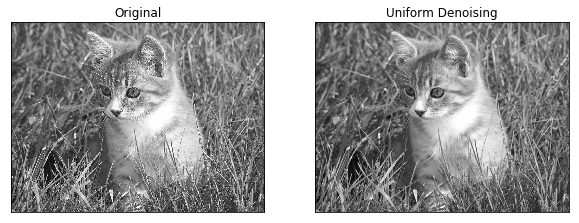

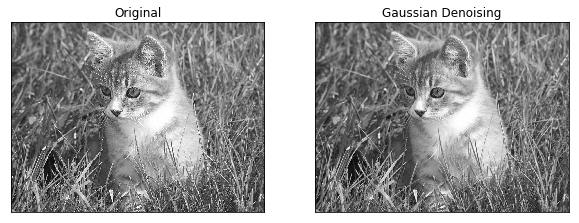

In [46]:
#blurring ('kitty-cat.jpg','uniform_blur')
#blurring('kitty-cat.jpg','gaussian_blur')


In [347]:
def detect_edge(im, method):
    img=cv2.imread(im,0) 

    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    canny = cv2.Canny(img,1,2)

    plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.show()

    if method=='horizontal':
        plt.subplot(2,2,1),plt.imshow(sobelx,cmap = 'gray')
        plt.title('Horizontal'), plt.xticks([]), plt.yticks([])
        plt.show()
    if method=='vertical':
        plt.subplot(2,2,1),plt.imshow(sobely,cmap = 'gray')
        plt.title('Vertical'), plt.xticks([]), plt.yticks([]) 
        plt.show()
    if method=='both':
        plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
        plt.title('Both horizontal and vertical'), plt.xticks([]), plt.yticks([])
        plt.show()


In [348]:
#detect_edge('canny1.jpg', 'vertical')
#detect_edge('edge_full.png', 'horizontal')
#detect_edge('edge_full.png', 'both') i think this one is wrong...

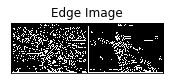